<h1>EDA for Oracle Implementation and Prototype</h1>
This notebook will be used to test 10 identified critical tags from unit 19. Here we will separate a single dataset into 10, and we will use data exploration to identify the anomaly from all these tags. The 10 identified critical tags are:

1. Unit 19 Feed (19FC001)
2. System Pressure (19PC048)
3. R-1901 Average Temperature
4. R-1902 Average Temperature
5. R-1903 Average Temperature
6. Compressor Spillback (19FC008)
7. P-1901A Discharge Pressure (19PI002)
8. P-1901B Discharge Pressure (19PI003)
9. K-1901A Cyclinder Temperature (19TI702)
10. K-1901B Cyclinder Temperature (19TI802)

In [1]:
#let's download the usual library first
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from ydata_profiling import ProfileReport

In [2]:
#then let's load the data and look at it's info
df=pd.read_excel('OracleTags.xlsx',sheet_name='Data')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50089 entries, 0 to 50088
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       50089 non-null  datetime64[ns]
 1   Feed19     50089 non-null  object        
 2   SysP       50089 non-null  object        
 3   ART1       50089 non-null  object        
 4   ART2       50089 non-null  object        
 5   ART3       50089 non-null  object        
 6   Spillback  50089 non-null  object        
 7   DisP01A    50089 non-null  object        
 8   DisP01B    50089 non-null  object        
 9   CompTempA  50089 non-null  object        
 10  CompTempB  50089 non-null  object        
dtypes: datetime64[ns](1), object(10)
memory usage: 4.2+ MB


In [3]:
#seems like the data is no null, but all data seems to be object, let's change the data type
#better create a function
def change_types(df):
    for col in df.columns:
        if df[col].dtypes == 'object':
            df[col] = df[col].apply(pd.to_numeric,errors ='coerce')
    return df

In [4]:
#appy the functions
df= change_types(df)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50089 entries, 0 to 50088
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       50089 non-null  datetime64[ns]
 1   Feed19     49833 non-null  float64       
 2   SysP       50065 non-null  float64       
 3   ART1       50068 non-null  float64       
 4   ART2       50068 non-null  float64       
 5   ART3       50068 non-null  float64       
 6   Spillback  50055 non-null  float64       
 7   DisP01A    50065 non-null  float64       
 8   DisP01B    50069 non-null  float64       
 9   CompTempA  50066 non-null  float64       
 10  CompTempB  50065 non-null  float64       
dtypes: datetime64[ns](1), float64(10)
memory usage: 4.2 MB


In [5]:
#now we can see the null, meaning there's some string values when we transfer the file from excel.
#better we forward fill the value.
df=df.fillna(method='ffill')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50089 entries, 0 to 50088
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       50089 non-null  datetime64[ns]
 1   Feed19     50089 non-null  float64       
 2   SysP       50089 non-null  float64       
 3   ART1       50089 non-null  float64       
 4   ART2       50089 non-null  float64       
 5   ART3       50089 non-null  float64       
 6   Spillback  50089 non-null  float64       
 7   DisP01A    50089 non-null  float64       
 8   DisP01B    50089 non-null  float64       
 9   CompTempA  50089 non-null  float64       
 10  CompTempB  50089 non-null  float64       
dtypes: datetime64[ns](1), float64(10)
memory usage: 4.2 MB


Alright, now there's no more null value. Let's move to the 2nd part. The visual representation

<h2>Trending Graph and BoxPlots</h2>
Let's plot all the columns into each individual plot

In [6]:
#first let's create 2 graph, one with histogram and the other with boxplot

#create a cluster dataframe
cluster1 = ['Date','Feed19','SysP']
cluster2 = ['Date','ART1','ART2','ART3']
cluster3 = ['Date','Spillback','CompTempA','CompTempB']
cluster4 = ['Date','DisP01A','DisP01B']

#separate into different cluster
df1= df[cluster1]
df2= df[cluster2]
df3= df[cluster3]
df4= df[cluster4]


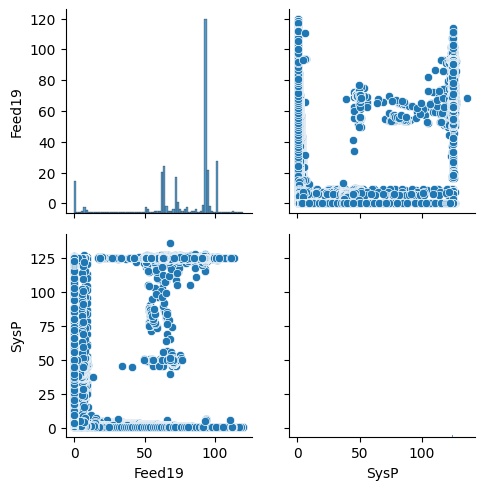

In [7]:
#now let's plot individually (for cluster 1)
hist1 = sns.PairGrid(df1)
hist1.map_diag(sns.histplot)
hist1.map_offdiag(sns.scatterplot)

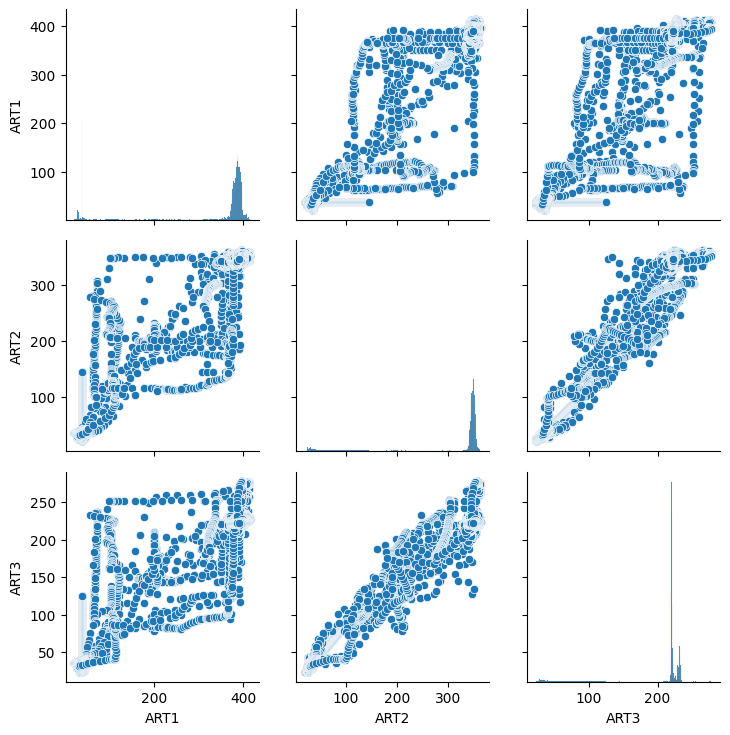

In [8]:
#now for cluster 2
hist2 = sns.PairGrid(df2)
hist2.map_diag(sns.histplot)
hist2.map_offdiag(sns.scatterplot)

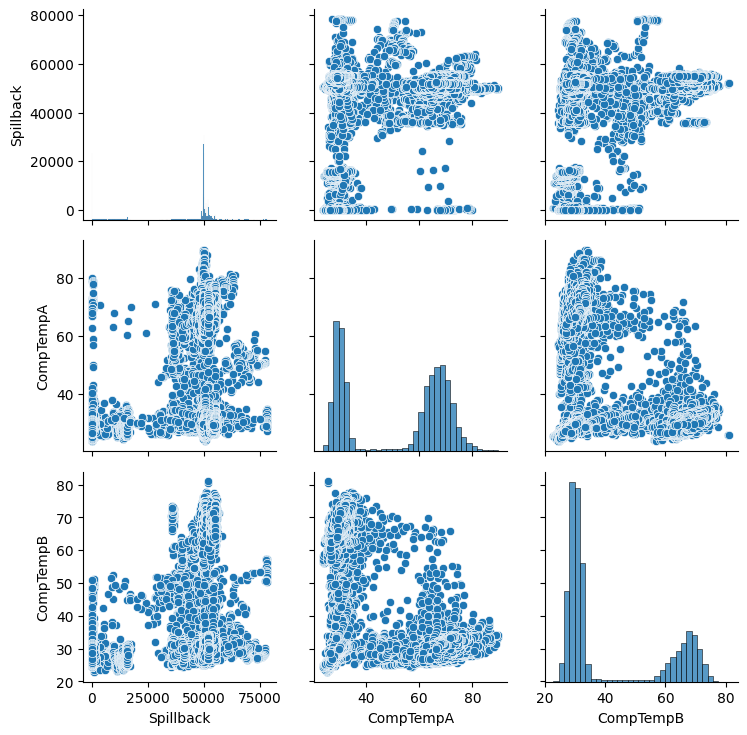

In [9]:
#now for cluster 3
hist3 = sns.PairGrid(df3)
hist3.map_diag(sns.histplot)
hist3.map_offdiag(sns.scatterplot)

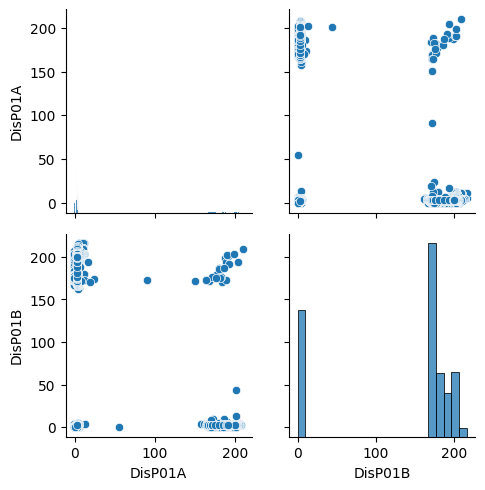

In [10]:
#now for cluster 4
hist4 = sns.PairGrid(df4)
hist4.map_diag(sns.histplot)
hist4.map_offdiag(sns.scatterplot)

<h3>Now let's do it for boxplot</h3>

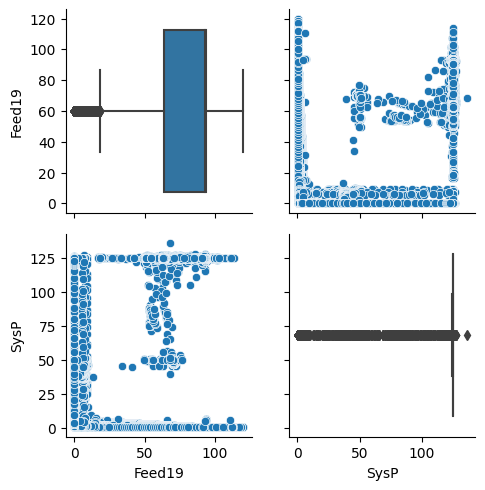

In [11]:
#for cluster 1
box1 = sns.PairGrid(df1)
box1.map_diag(sns.boxplot)
box1.map_offdiag(sns.scatterplot)

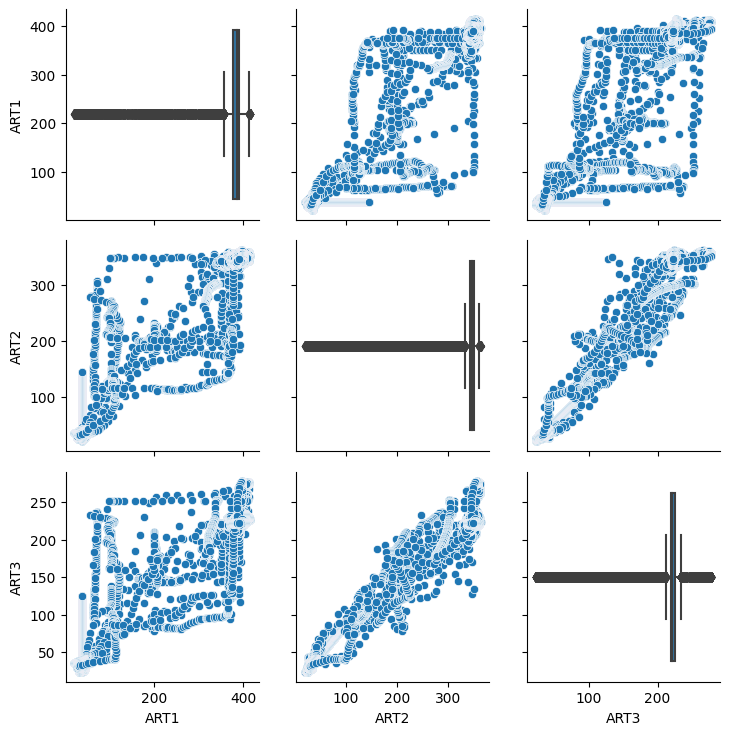

In [12]:
#for cluster 2
box2 = sns.PairGrid(df2)
box2.map_diag(sns.boxplot)
box2.map_offdiag(sns.scatterplot)

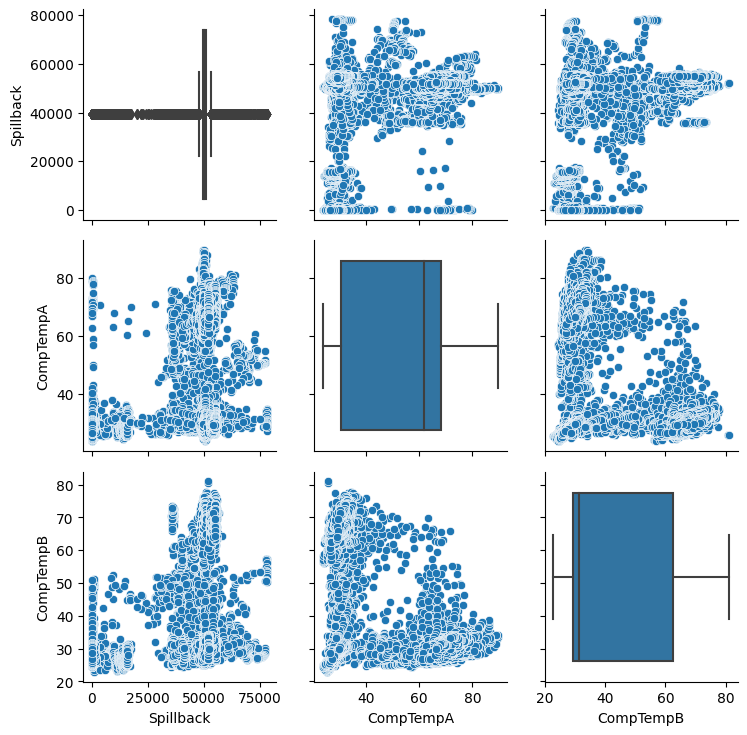

In [13]:
#for cluster3
box3 = sns.PairGrid(df3)
box3.map_diag(sns.boxplot)
box3.map_offdiag(sns.scatterplot)

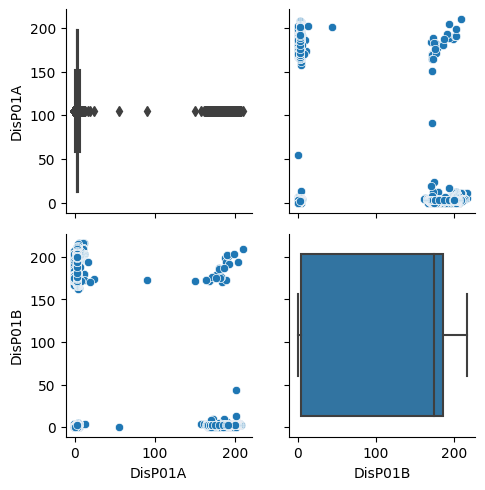

In [14]:
#for cluster 4
box4 = sns.PairGrid(df4)
box4.map_diag(sns.boxplot)
box4.map_offdiag(sns.scatterplot)

<h3>Now it's time to do some ydata profiling</h3>

In [16]:
report = ProfileReport(df,title = "Critical Unit 19 Tags")
report.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]